# Microsoft Movie Studio GTM Strategies

![Microsoft Movies](https://3er1viui9wo30pkxh1v2nh4w-wpengine.netdna-ssl.com/wp-content/uploads/prod/2019/01/Invisible-Rev-2-640.jpg)

## The Challenge

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.


## The Goal & Questions to Answer

- Increase awareness
- Increase revenue (existing customers spend more & attract new customers)
- Create synergies with existing business line (servers, XBox)
- Compete with Amazon Prime Video, Apple TV

Given the background and goals, our questions of interest were:

- Q1: Which studio would be the best the partner with to create video?
- Q2: What genres can generate most revenue, proft and profit margin?
- Q3: What are the seasonalities in movies industry?
- Q4: Who are the top actors that drove the most revenue?
- Q5: What characteristics do top rated movies have?

Analyzing the data from Box Office Mojo, IMDB, Rotten Tomatoes and TheMovieDB.org to answer these questions will help them formulate Go-To-Market Strategies to launch original video content.

## Import packages 

In [2]:
# import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Q1: Which studio would be the best the partner with to create video? 

In [4]:
# loading data

bom_dataset = pd.read_csv('bom_dataset.csv')
bom_dataset

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
# selecting rows based from only Top 10 studios based on total gross revenue

bom_dataset['total_gross'] = bom_dataset['domestic_gross'] + bom_dataset['foreign_gross']
bom_dataset1 = bom_dataset.groupby(['studio'], as_index=False).sum()
bom_dataset1.sort_values(by=['total_gross'], ascending = False)

top10studios = ['BV', 'Fox', 'WB', 'Uni.','Sony','Par.','WB (NL)','LGF','LG/S','P/DW'] 

bom_dataset2 = bom_dataset[bom_dataset['studio'].isin(top10studios)] 
bom_dataset2

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3264,2001: A Space Odyssey (2018 re-release),WB,3200000.0,NaN,2018,NaN
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3289,Schindler's List (2018 re-release),Uni.,833000.0,NaN,2018,NaN
3369,Loving Pablo,Uni.,22000.0,NaN,2018,NaN


246480115973.0


In [6]:
# calculating total industry revenue, studio revenue percentage

total_studio = bom_dataset1['total_gross'].sum()
bom_dataset1['percentage'] = bom_dataset1['total_gross'] / total_studio *100
bom_dataset_top10 = bom_dataset1.sort_values(by=['total_gross'], ascending = False).head(10)
bom_dataset_top10

,studio,domestic_gross,foreign_gross,year,total_gross,percentage
36,BV,1.841903e+10,2.579385e+10,213451,4.419038e+10,17.928579
93,Fox,1.094950e+10,2.005587e+10,273882,3.098037e+10,12.569114
246,WB,1.216805e+10,1.866790e+10,281941,3.079150e+10,12.492490
238,Uni.,1.290239e+10,1.685477e+10,296082,2.974681e+10,12.068643
215,Sony,8.459683e+09,1.394535e+10,221575,2.240472e+10,9.089867
185,Par.,7.685871e+09,1.186338e+10,203417,1.944420e+10,7.888749
247,WB (NL),3.995700e+09,6.339000e+09,90644,1.031410e+10,4.184557
134,LGF,4.118963e+09,4.482619e+09,207437,8.467471e+09,3.435357
133,LG/S,2.078200e+09,3.353724e+09,82599,5.318924e+09,2.157953
171,P/DW,1.682900e+09,3.393600e+09,20109,5.076500e+09,2.059598


In [7]:
# calculating top 10 studios revenue percentage (industry concentration)

top10studiopct = bom_dataset_top10['percentage'].sum()
print(top10studiopct)

83.87490555572695


Text(0.5, 1.0, 'Top 10 Studios Contribute 84% of revenue')

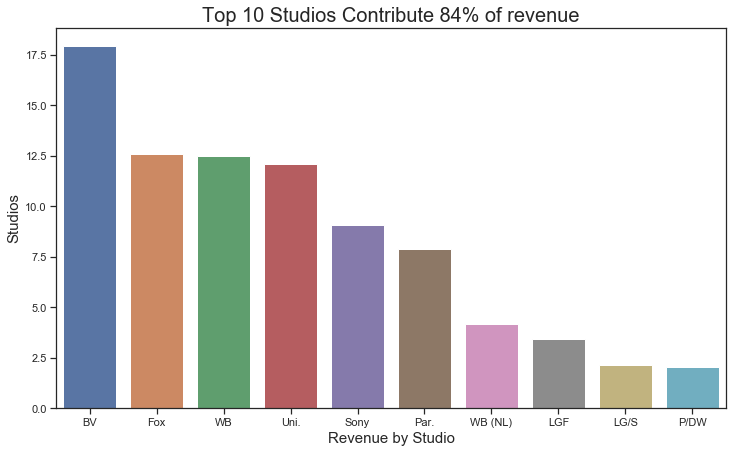

In [8]:
# Plot top 10 studios revenue percentage (industry concentration)

sns.set(style="ticks")
fig, ax = plt.subplots(figsize = (12,7))

sns.barplot(x = 'studio', y= "percentage", data = bom_dataset_top10)
ax.set_xlabel('Revenue by Studio', fontsize=15)
ax.set_ylabel('Studios', fontsize=15)
ax.set_title('Top 10 Studios Contribute 84% of revenue', fontsize=20)


Text(0.5, 1, 'Top 10 Studios Domestic vs. Foreign Revenue')

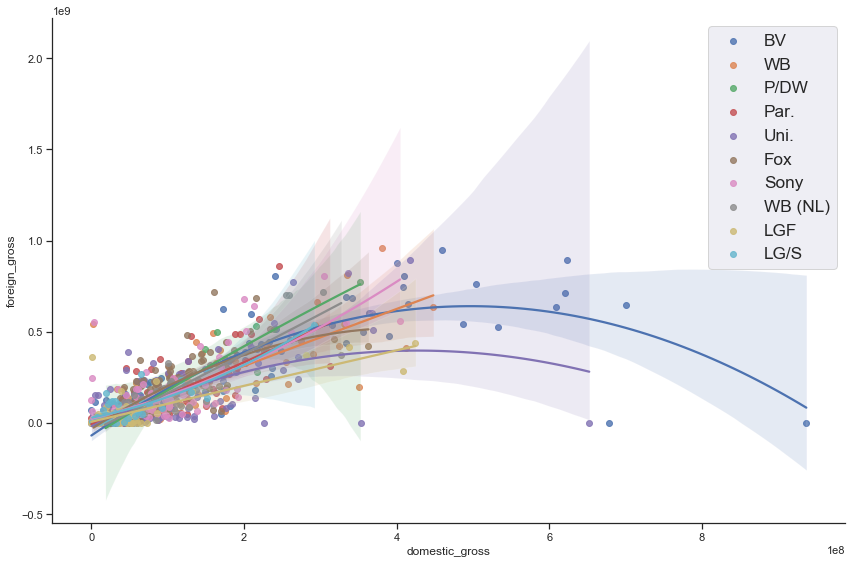

In [9]:
# Plot top 10 studios revenue break down by domestic and foreign

sns.lmplot('domestic_gross','foreign_gross', hue = 'studio',order =2, data = bom_dataset2, height=8, aspect=1.5, legend = False)

sns.set(rc={'xtick.labelsize':20,
            'ytick.labelsize':20})
plt.legend(fontsize='x-large', title_fontsize='15')

ax.set_title('Top 10 Studios Domestic vs. Foreign Revenue', fontsize=20)


## Q2: What genres can generate most revenue, proft and profit margin?

In [10]:
# import data

imdb_dataset = pd.read_csv('imdb_dataset.csv')
imdb_dataset

tn_dataset = pd.read_csv('tn_dataset.csv')
tn_dataset

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [11]:
# merging these two tables to connect genres with gross revenue and product budget

imdb_tn = imdb_dataset.merge(tn_dataset, how = 'inner', left_on=['primary_title'], right_on=['movie'] )
imdb_tn

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,"$20,000,000","$70,433,227","$122,133,227"
2,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,"Nov 14, 2008",Fuel,"$2,500,000","$174,255","$174,255"
3811,tt9729206,Diner,Diner,2019,NaN,Crime,11,"Apr 2, 1982",Diner,"$5,000,000","$12,592,907","$12,592,907"
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008",Traitor,"$22,000,000","$23,530,831","$27,882,226"
3813,tt9844102,Ray,Ray,2018,111.0,Crime,8,"Oct 29, 2004",Ray,"$40,000,000","$75,305,995","$124,823,094"


In [12]:
# teasing out genres data

genres_new = imdb_tn['genres'].apply(lambda x: str(x).split(',')).apply(pd.Series)
genres_new

,0,1,2
0,Action,Animation,Comedy
1,Action,Adventure,Fantasy
2,nan,NaN,NaN
3,Comedy,Mystery,NaN
4,Adventure,Drama,Romance
...,...,...,...
3810,Documentary,Sport,NaN
3811,Crime,NaN,NaN
3812,Action,Drama,Romance
3813,Crime,NaN,NaN


In [14]:
# adding genres back to the merged table

imdb_tn_full = imdb_tn.merge(genres_new, left_index = True, right_index = True)
imdb_tn_full

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,0,1,2
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",Action,Animation,Comedy
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,"$20,000,000","$70,433,227","$122,133,227",Action,Adventure,Fantasy
2,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",nan,NaN,NaN
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",Comedy,Mystery,NaN
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",Adventure,Drama,Romance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,"Nov 14, 2008",Fuel,"$2,500,000","$174,255","$174,255",Documentary,Sport,NaN
3811,tt9729206,Diner,Diner,2019,NaN,Crime,11,"Apr 2, 1982",Diner,"$5,000,000","$12,592,907","$12,592,907",Crime,NaN,NaN
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008",Traitor,"$22,000,000","$23,530,831","$27,882,226",Action,Drama,Romance
3813,tt9844102,Ray,Ray,2018,111.0,Crime,8,"Oct 29, 2004",Ray,"$40,000,000","$75,305,995","$124,823,094",Crime,NaN,NaN


In [15]:
# removing the duplicated or unncessary columns

imdb_tn_full.drop(["genres", 'primary_title',"id", 'movie'], axis = 1, inplace=True)
imdb_tn_full

,tconst,original_title,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,0,1,2
0,tt0249516,Foodfight!,2012,91.0,"Dec 31, 2012","$45,000,000",$0,"$73,706",Action,Animation,Comedy
1,tt0293429,Mortal Kombat,2021,NaN,"Aug 18, 1995","$20,000,000","$70,433,227","$122,133,227",Action,Adventure,Fantasy
2,tt0326592,The Overnight,2010,88.0,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996",nan,NaN,NaN
3,tt3844362,The Overnight,2015,79.0,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996",Comedy,Mystery,NaN
4,tt0337692,On the Road,2012,124.0,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",Adventure,Drama,Romance
...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,2018,NaN,"Nov 14, 2008","$2,500,000","$174,255","$174,255",Documentary,Sport,NaN
3811,tt9729206,Diner,2019,NaN,"Apr 2, 1982","$5,000,000","$12,592,907","$12,592,907",Crime,NaN,NaN
3812,tt9805168,Traitor,2015,110.0,"Aug 27, 2008","$22,000,000","$23,530,831","$27,882,226",Action,Drama,Romance
3813,tt9844102,Ray,2018,111.0,"Oct 29, 2004","$40,000,000","$75,305,995","$124,823,094",Crime,NaN,NaN


In [16]:
# melting genres to multiple rows and dropping the rows with null genre

imdb_tn_full = imdb_tn_full.melt(id_vars = ['tconst', 'original_title', 'start_year', 'runtime_minutes','release_date', 'domestic_gross', 'worldwide_gross', 'production_budget'], value_name = 'genre')
imdb_tn_full.dropna(subset=['genre'], inplace = True)
imdb_tn_full.sort_values(by = 'genre')

,tconst,original_title,start_year,runtime_minutes,release_date,domestic_gross,worldwide_gross,production_budget,variable,genre
0,tt0249516,Foodfight!,2012,91.0,"Dec 31, 2012",$0,"$73,706","$45,000,000",0,Action
961,tt1413492,12 Strong,2018,130.0,"Jan 19, 2018","$45,819,713","$71,118,378","$35,000,000",0,Action
3089,tt7967156,Heist,2017,73.0,"Nov 13, 2015","$50,136","$3,324,131","$8,900,000",0,Action
3088,tt7967156,Heist,2017,73.0,"Nov 9, 2001","$23,483,357","$28,906,817","$35,000,000",0,Action
3087,tt5112932,Heist,2015,47.0,"Nov 13, 2015","$50,136","$3,324,131","$8,900,000",0,Action
...,...,...,...,...,...,...,...,...,...,...
966,tt6449960,Paranoia,2016,NaN,"Aug 16, 2013","$7,388,654","$16,340,767","$40,000,000",0,nan
483,tt10453328,Coco,2018,NaN,"Nov 22, 2017","$209,726,015","$798,008,101","$175,000,000",0,nan
294,tt10188180,Empire,2016,83.0,"Dec 6, 2002","$17,504,595","$18,495,444","$3,500,000",0,nan
3690,tt6612954,The Dress,2017,127.0,"Jan 16, 1998","$16,556","$16,556","$2,650,000",0,nan


In [17]:
# converting $ cells into numeric cells
imdb_tn_full[imdb_tn_full.columns[5:8]] = imdb_tn_full[imdb_tn_full.columns[5:8]].replace('[\$,]', '', regex=True).astype(float)
imdb_tn_full

,tconst,original_title,start_year,runtime_minutes,release_date,domestic_gross,worldwide_gross,production_budget,variable,genre
0,tt0249516,Foodfight!,2012,91.0,"Dec 31, 2012",0.0,73706.0,45000000.0,0,Action
1,tt0293429,Mortal Kombat,2021,NaN,"Aug 18, 1995",70433227.0,122133227.0,20000000.0,0,Action
2,tt0326592,The Overnight,2010,88.0,"Jun 19, 2015",1109808.0,1165996.0,200000.0,0,nan
3,tt3844362,The Overnight,2015,79.0,"Jun 19, 2015",1109808.0,1165996.0,200000.0,0,Comedy
4,tt0337692,On the Road,2012,124.0,"Mar 22, 2013",720828.0,9313302.0,25000000.0,0,Adventure
...,...,...,...,...,...,...,...,...,...,...
11398,tt8155288,Happy Death Day 2U,2019,100.0,"Feb 13, 2019",28051045.0,64179495.0,9000000.0,2,Mystery
11402,tt8266310,Blinded by the Light,2019,117.0,"Aug 14, 2019",0.0,0.0,15000000.0,2,Drama
11430,tt9111170,What Lies Beneath,2018,NaN,"Jul 21, 2000",155464351.0,288693989.0,90000000.0,2,Thriller
11431,tt9125468,Sugar Town,2018,75.0,"Sep 17, 1999",178095.0,178095.0,250000.0,2,Sci-Fi


In [18]:
# calculating profit and and profit margin

imdb_tn_full['profit'] = round(imdb_tn_full['worldwide_gross'] - imdb_tn_full['production_budget'] )
imdb_tn_full['profit%'] = round(imdb_tn_full['profit'] / imdb_tn_full['production_budget'] * 100)
imdb_tn_full

,tconst,original_title,start_year,runtime_minutes,release_date,domestic_gross,worldwide_gross,production_budget,variable,genre,profit,profit%
0,tt0249516,Foodfight!,2012,91.0,"Dec 31, 2012",0.0,73706.0,45000000.0,0,Action,-44926294.0,-100.0
1,tt0293429,Mortal Kombat,2021,NaN,"Aug 18, 1995",70433227.0,122133227.0,20000000.0,0,Action,102133227.0,511.0
2,tt0326592,The Overnight,2010,88.0,"Jun 19, 2015",1109808.0,1165996.0,200000.0,0,nan,965996.0,483.0
3,tt3844362,The Overnight,2015,79.0,"Jun 19, 2015",1109808.0,1165996.0,200000.0,0,Comedy,965996.0,483.0
4,tt0337692,On the Road,2012,124.0,"Mar 22, 2013",720828.0,9313302.0,25000000.0,0,Adventure,-15686698.0,-63.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11398,tt8155288,Happy Death Day 2U,2019,100.0,"Feb 13, 2019",28051045.0,64179495.0,9000000.0,2,Mystery,55179495.0,613.0
11402,tt8266310,Blinded by the Light,2019,117.0,"Aug 14, 2019",0.0,0.0,15000000.0,2,Drama,-15000000.0,-100.0
11430,tt9111170,What Lies Beneath,2018,NaN,"Jul 21, 2000",155464351.0,288693989.0,90000000.0,2,Thriller,198693989.0,221.0
11431,tt9125468,Sugar Town,2018,75.0,"Sep 17, 1999",178095.0,178095.0,250000.0,2,Sci-Fi,-71905.0,-29.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

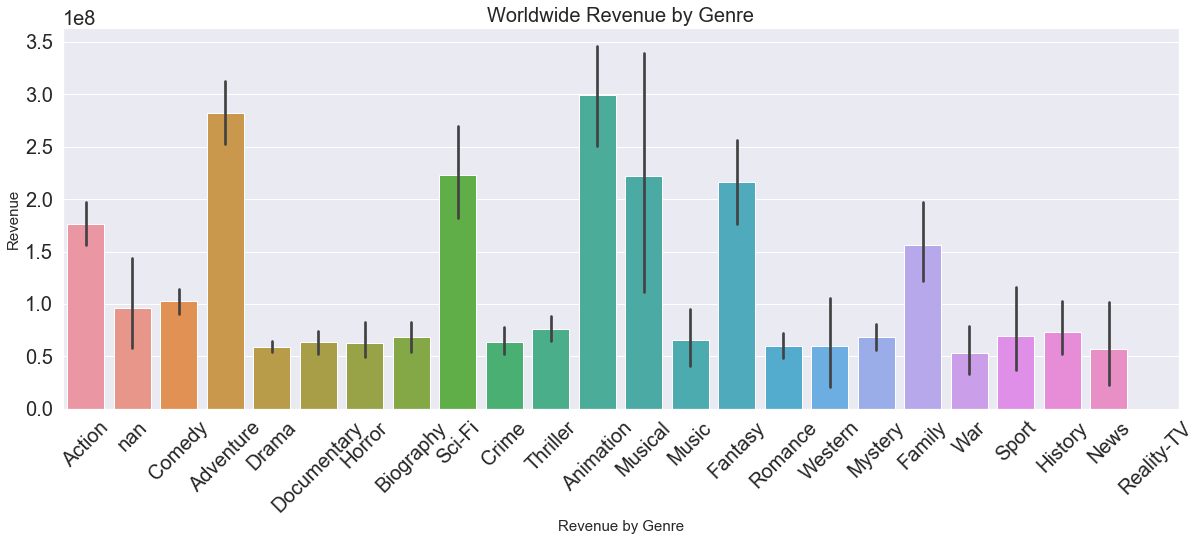

In [19]:
# plotting gross revenue by genre

fig, ax = plt.subplots(figsize = (20,7))

sns.barplot(x = 'genre', y= "worldwide_gross", data = imdb_tn_full)
ax.set_xlabel('Revenue by Genre', fontsize=15)
ax.set_ylabel('Revenue', fontsize=15)
ax.set_title('Worldwide Revenue by Genre', fontsize=20)
plt.xticks(rotation='45')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

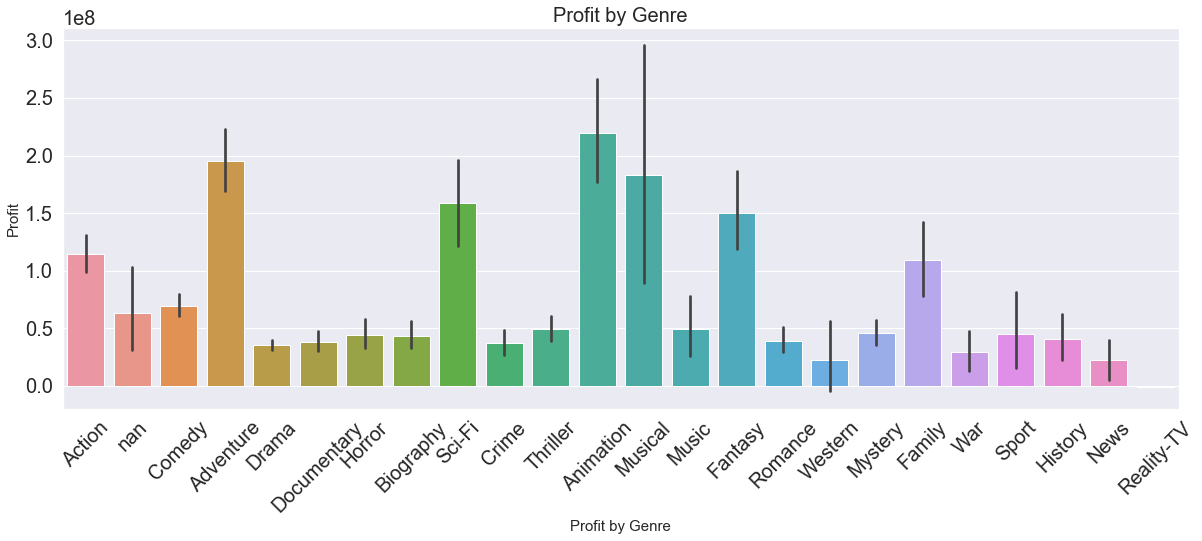

In [20]:
# plotting profit by genre

fig, ax = plt.subplots(figsize = (20,7))

sns.barplot(x = 'genre', y= "profit", data = imdb_tn_full)
ax.set_xlabel('Profit by Genre', fontsize=15)
ax.set_ylabel('Profit', fontsize=15)
ax.set_title('Profit by Genre', fontsize=20)
plt.xticks(rotation='45')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

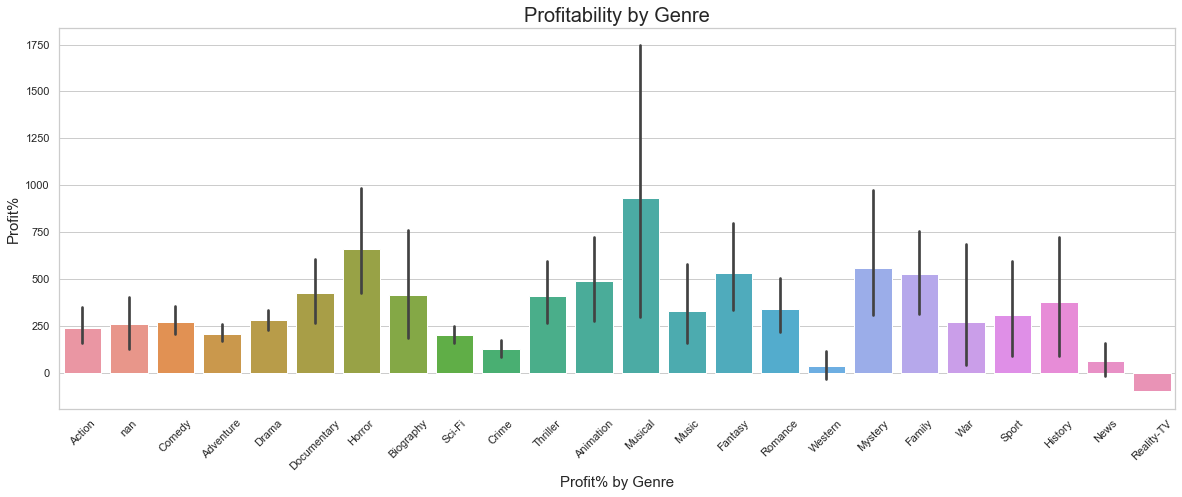

In [21]:
# plotting profit margin by genre

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize = (20,7))

sns.barplot(x = 'genre', y= "profit%", data = imdb_tn_full)
ax.set_xlabel('Profit% by Genre', fontsize=15)
ax.set_ylabel('Profit%', fontsize=15)
ax.set_title('Profitability by Genre', fontsize=20)
plt.xticks(rotation='45')

Text(0, 0.5, 'Profitability by Genre')

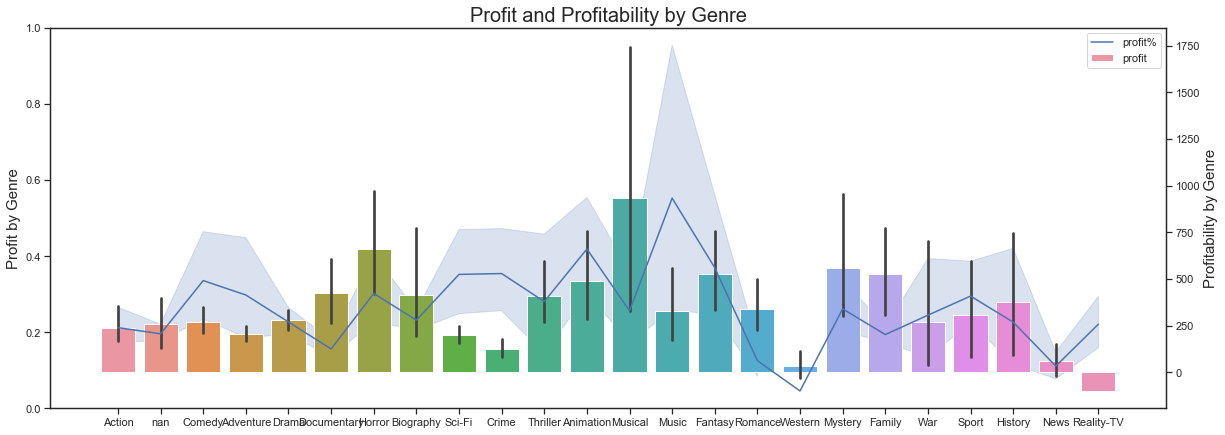

In [46]:
# plotting profit by genre + average margin (WIP)

sns.set(style="ticks")

fig, ax1 = plt.subplots(figsize = (20,7))
ax2 = ax1.twinx()

sns.barplot(x = 'genre', y= "profit%", data = imdb_tn_full, label='profit')
sns.lineplot(x = 'genre', y= 'profit%', data = imdb_tn_full, label='profit%')
plt.xticks(rotation='45')

# setting titles and axis labels
ax1.set_title('Profit and Profitability by Genre', fontsize=20)
ax1.set_ylabel('Profit by Genre', fontsize=15)
ax2.set_ylabel('Profitability by Genre', fontsize=15)


## Q3: What are the seasonalities in movies industry?

In [22]:
# import release date data

imdb_tn_full

,tconst,original_title,start_year,runtime_minutes,release_date,domestic_gross,worldwide_gross,production_budget,variable,genre,profit,profit%
0,tt0249516,Foodfight!,2012,91.0,"Dec 31, 2012",0.0,73706.0,45000000.0,0,Action,-44926294.0,-100.0
1,tt0293429,Mortal Kombat,2021,NaN,"Aug 18, 1995",70433227.0,122133227.0,20000000.0,0,Action,102133227.0,511.0
2,tt0326592,The Overnight,2010,88.0,"Jun 19, 2015",1109808.0,1165996.0,200000.0,0,nan,965996.0,483.0
3,tt3844362,The Overnight,2015,79.0,"Jun 19, 2015",1109808.0,1165996.0,200000.0,0,Comedy,965996.0,483.0
4,tt0337692,On the Road,2012,124.0,"Mar 22, 2013",720828.0,9313302.0,25000000.0,0,Adventure,-15686698.0,-63.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11398,tt8155288,Happy Death Day 2U,2019,100.0,"Feb 13, 2019",28051045.0,64179495.0,9000000.0,2,Mystery,55179495.0,613.0
11402,tt8266310,Blinded by the Light,2019,117.0,"Aug 14, 2019",0.0,0.0,15000000.0,2,Drama,-15000000.0,-100.0
11430,tt9111170,What Lies Beneath,2018,NaN,"Jul 21, 2000",155464351.0,288693989.0,90000000.0,2,Thriller,198693989.0,221.0
11431,tt9125468,Sugar Town,2018,75.0,"Sep 17, 1999",178095.0,178095.0,250000.0,2,Sci-Fi,-71905.0,-29.0


In [26]:
# converting release date to datetime and extract month

imdb_tn_full['release_date'] = pd.to_datetime(imdb_tn_full['release_date'])
imdb_tn_full['month'] = imdb_tn_full['release_date'].dt.month
imdb_tn_full['Month-str'] = imdb_tn_full['release_date'].dt.strftime('%b')
imdb_tn_full = imdb_tn_full.sort_values(by=['month'], ascending = True)
imdb_tn_full

,tconst,original_title,start_year,runtime_minutes,release_date,domestic_gross,worldwide_gross,production_budget,variable,genre,profit,profit%,month,Month-str
4776,tt1413492,12 Strong,2018,130.0,2018-01-19,45819713.0,71118378.0,35000000.0,1,Drama,36118378.0,103.0,1,Jan
8043,tt1038686,Legion,2010,100.0,2010-01-22,40168080.0,67647574.0,26000000.0,2,Horror,41647574.0,160.0,1,Jan
5120,tt1578275,The Dilemma,2011,111.0,2011-01-14,48475290.0,70546865.0,70000000.0,1,Drama,546865.0,1.0,1,Jan
5114,tt1572315,Texas Chainsaw 3D,2013,92.0,2013-01-04,34341945.0,47666013.0,20000000.0,1,Thriller,27666013.0,138.0,1,Jan
2461,tt2196200,Hoodwinked,2012,87.0,2006-01-13,51386611.0,109843390.0,17500000.0,0,Documentary,92343390.0,528.0,1,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6980,tt6266538,Vice,2018,132.0,2018-12-25,47836282.0,70883171.0,60000000.0,1,Comedy,10883171.0,18.0,12,Dec
6979,tt3480796,Vice,2015,96.0,2018-12-25,47836282.0,70883171.0,60000000.0,1,Adventure,10883171.0,18.0,12,Dec
6978,tt3470600,Sing,2016,108.0,2016-12-21,270329045.0,634454789.0,75000000.0,1,Comedy,559454789.0,746.0,12,Dec
2433,tt2179165,Nine,2016,NaN,2009-12-18,19676965.0,53508858.0,80000000.0,0,Horror,-26491142.0,-33.0,12,Dec


Text(0.5, 1, 'Movie Seasonality by Month')

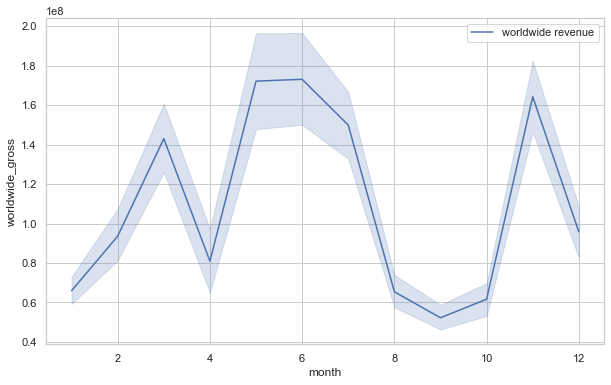

In [30]:
# plotting boxplot revenue seasonality by month

sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize = (10,6))
sns.lineplot(x="month", y="worldwide_gross", data = imdb_tn_full, label='worldwide revenue')
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Worldwide Gross Revenue', fontsize=15)
ax.set_title('Movie Seasonality by Month', fontsize=20)

Text(0.5, 1, 'Movie Seasonality by Month')

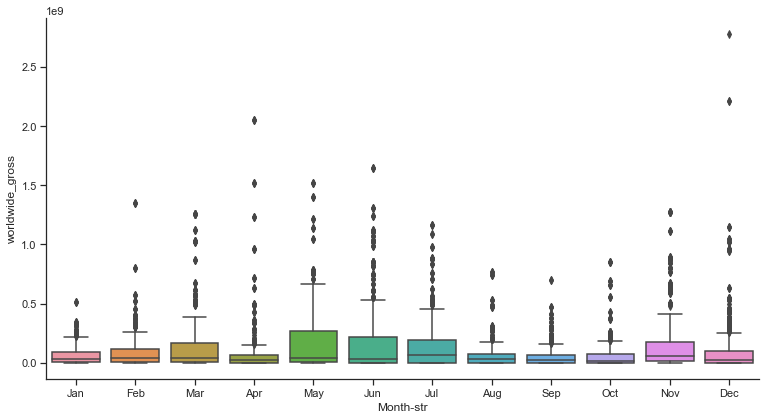

In [63]:
# plotting barplot revenue seasonality by month

sns.catplot(x="Month-str", y="worldwide_gross", data=imdb_tn_full, kind="box", height=6, aspect=1.8)

ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Worldwide Gross Revenue', fontsize=15)
ax.set_title('Movie Seasonality by Month', fontsize=20)

## (optional) Correlation between profit, margin, worldwide revenue and product budget

In [31]:
# exploring correlation between month

imdb_tn_full

,tconst,original_title,start_year,runtime_minutes,release_date,domestic_gross,worldwide_gross,production_budget,variable,genre,profit,profit%,month,Month-str
4776,tt1413492,12 Strong,2018,130.0,2018-01-19,45819713.0,71118378.0,35000000.0,1,Drama,36118378.0,103.0,1,Jan
8043,tt1038686,Legion,2010,100.0,2010-01-22,40168080.0,67647574.0,26000000.0,2,Horror,41647574.0,160.0,1,Jan
5120,tt1578275,The Dilemma,2011,111.0,2011-01-14,48475290.0,70546865.0,70000000.0,1,Drama,546865.0,1.0,1,Jan
5114,tt1572315,Texas Chainsaw 3D,2013,92.0,2013-01-04,34341945.0,47666013.0,20000000.0,1,Thriller,27666013.0,138.0,1,Jan
2461,tt2196200,Hoodwinked,2012,87.0,2006-01-13,51386611.0,109843390.0,17500000.0,0,Documentary,92343390.0,528.0,1,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6980,tt6266538,Vice,2018,132.0,2018-12-25,47836282.0,70883171.0,60000000.0,1,Comedy,10883171.0,18.0,12,Dec
6979,tt3480796,Vice,2015,96.0,2018-12-25,47836282.0,70883171.0,60000000.0,1,Adventure,10883171.0,18.0,12,Dec
6978,tt3470600,Sing,2016,108.0,2016-12-21,270329045.0,634454789.0,75000000.0,1,Comedy,559454789.0,746.0,12,Dec
2433,tt2179165,Nine,2016,NaN,2009-12-18,19676965.0,53508858.0,80000000.0,0,Horror,-26491142.0,-33.0,12,Dec


In [32]:
# dropping all other columns except profit, margin, worldwide revenue and product budget

imdb_tn_corr = imdb_tn_full.drop(['tconst','original_title','start_year','runtime_minutes','release_date', 'variable','Month-str', 'month','domestic_gross'], axis = 1)


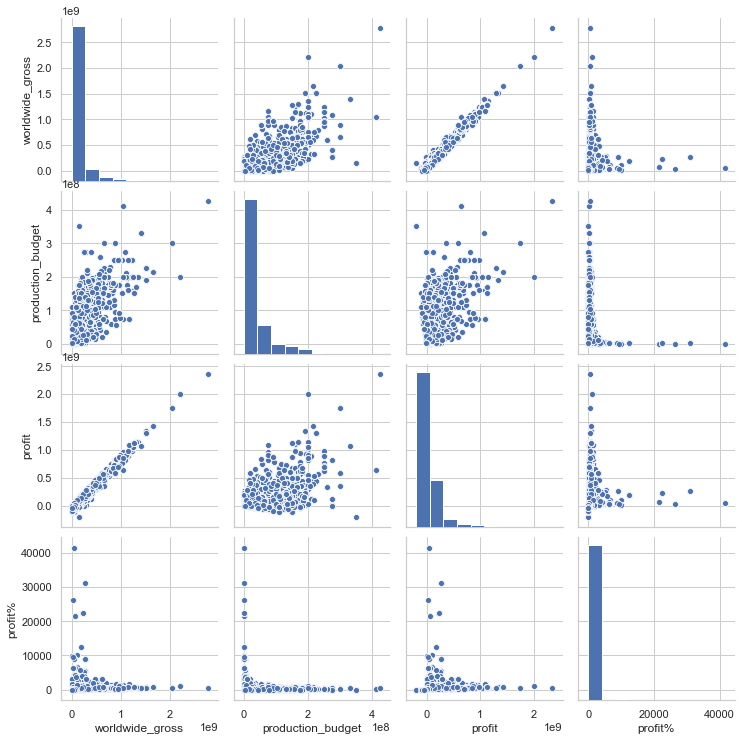

In [33]:
# plotting pairplot to find relationships / correlations

sns.pairplot(imdb_tn_corr)


## Q4: Who are the top actors that drove the most revenue?

## Q5: What characteristics do top rated movies have?

## R+K Recommendations

- Partner with Top 10 studios, Universal/BV for domestic market, WB&Sony for foreign markets 
- Genre
  * Profit: Animation, Adventure and Musical generate most profit while Musical has huge variance
  * Profitability: Musical and Horror have the highest profitability, while Musical has huge variance
- Seasonality
  * Summer and holiday seasons are the best to launch new titles
  * Marque titles / franchises
- Comics do exceedingly well  at the box office
  * DC owned by WarnerBros (HBO is their virtual distribution platform) 
  * Marvel owned by Disney (Disney+ is their virtual distribution platform)
- E-sports + gambling and viewing becoming increasingly popular
- One popular reason for watching games is for the storyline - similar to movies
  * Strong association between gaming and microsoft (XBox) 
  * Pre-existing relationships with developers + customer association to enable success in this space
- Large target audience - children to adult ability to target

## Limitations & Next Steps

- Missing linking data between IMDB and Rotten Tomato
- ...